# Data Analysis - Financial Time Series

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

[Executive Summary](#summary)

**TODO**

### **Resources**: 

**TODO**

# Executive Summary <a name="summary"></a>

**TODO**

These are the basic imports that we need to work with NumPy, Pandas and to plot data using Matplotlib functionalities

In [1]:
# for NumPy arrays
import numpy as np

# for Pandas Series and DataFrame
import pandas as pd

# for Matplotlib plotting
import matplotlib.pyplot as plt

# to do inline plots in the Notebook
%matplotlib inline

# for Operating System operations
import os

# 1. Introduction <a name="introduction"></a>

When you need to process data using a programming languages, either you have your data stored in a file or database (as we have seen in the previous lesson) or you get your data from a Data Provider, such as Bloomberg, Reuters, etc.

Typically, data providers store secured their data in remote servers and expose interfaces to the public: these are called [Application Programming Interfaces](https://en.wikipedia.org/wiki/Application_programming_interface) (APIs). For what concern us, an API is a particular piece of code that allows you to get data from a data provider.

There are plenty of APIs which manage the interface between Python code and financial data, like [Reuters Eikon Data API](https://developers.refinitiv.com/eikon-apis/eikon-data-api). Being a business in itself, most of APIs to retrieve financial data are not for free.

Luckily for us, and thanks to people like [Ran Aroussi](https://aroussi.com/), we have a Python API, called [yfinance](https://github.com/ranaroussi/yfinance), which is 100% free:

- yfinance Github page: [https://github.com/ranaroussi/yfinance](https://github.com/ranaroussi/yfinance);
- Blog post form Ran Aroussi with a yfinance tutorial: [https://aroussi.com/post/python-yahoo-finance](https://aroussi.com/post/python-yahoo-finance).

In a nutshell, yfinance - named after the now decommissioned _Yahoo! Finance_ API, is a reliable Python API to retrieve market data.

The yfinance API comes under the form of a Python module: `yfinance`. We shall see now how to include it in our Conda installation. 

## 1.1. Installing `yfinance` <a name="installing-yfinance"></a>

All you need to do to install yfinance library is to:

- (if not done already) in your Anaconda Navigator switch to the class `ITForBusAndFin2020_env` conda environment (see [Figure 1](#anaconda_nav_and_env)). For Mac users: in case you are working under `base (root)` environment, it's ok, you can stay there.

| ![](../images/anaconda_nav_and_env.PNG) <a name="anaconda_nav_and_env"></a>| 
|:--:| 
| _**Figure 1**: in Anaconda Navigator, switch to the class conda environment_ |

- open your terminal window (the usual black command line window) using the _CMD.exe Prompt_ app or the _console_shortcut_ app in the Anaconda Navigator (both apps are fine and you have displayed one or the other depending on whether you have already updated the Anaconda Navigator or not yet, see [Figure 2](#open_terminal)).

| ![](../images/CMD_exe.PNG) | 
|:--:| 
| ![](../images/console_shortcut.PNG) | 
| _**Figure 2**: Open a Terminal window using the  CMD.exe Prompt app or console_shorcut app in Anaconda Navigator_ <a name="open_terminal"></a>|

- in the terminal window, change directory to your local class folder typing `cd` followed by the complete path to the class folder (like `C:\Users\gabri\Projects\IT_For_Business_And_Finance_2019_20` on my local machine) and then type the command (see [Figure 3](#yfinance_png)) to install `yfinance`:
  ```
  pip install yfinance --upgrade --no-cache-dir
  ```
  
| ![](../images/yfinance.png) <a name="yfinance_png"></a>| 
|:--:| 
| _**Figure 3**: install `yfinance` package in conda_ |


- always type `y` when asked for installation confirmation;
- you can check that `yfinance` is now part of the packages available in your conda environment typing
  ```
  conda list 
  ```
  which lists all the packages installed (see resulting screen from `conda list` command in [Figure 4](#conda_list_yfinance))

| ![](../images/conda_list_yfinance.png) <a name="conda_list_yfinance"></a>| 
|:--:| 
| _**Figure 4**: check that `yfinance` is installed, typing `conda list`_ |


## 1.2. `yfinance` basic usage <a name="yfinance-basic-usage"></a>

To use yfinance library, we just import the corresponding `yfinance` Python module, giving it the `yf` alias.

In [2]:
import yfinance as yf

For details on `yfinance` usage, see the [dedicated blog post](https://aroussi.com/post/python-yahoo-finance) from Ran Aroussi. Broadly speaking, `yfinance` allows you to:

- get market and meta data for one (or more than one) security, using the `yf.Ticker()` module;
- doing mass download of market data, using the `yf.download()` function.

Let's reuse the utility function to delete files

In [ ]:
def removeFile(fileName):
    """
    removeFile(fileName) function remove file 'fileName', if it exists. It also prints on screen a success/failure message.
    
    Parameters:
        fileName (str): name of the file ('Data' folder is assumed)
        
    Returns:
        None
    """

    if os.path.isfile(os.path.join(dataFolderPath, fileName)):
        os.remove(os.path.join(dataFolderPath, fileName))

        # double-check if file still exists
        fileStillExists = os.path.isfile(os.path.join(dataFolderPath, fileName))

        if fileStillExists:
            print("Failure: file {} still exists...".format(fileName))
        else:
            print("Success: file {} successfully removed!".format(fileName))
            
    else:
        print("File {} already removed.".format(fileName))

### 1.2.1. get market and meta data: `yf.Ticker()` module <a name="get-market-and-meta-data:-yf.ticker()-module"></a>

In [3]:
aapl = yf.Ticker("AAPL")
aapl

yfinance.Ticker object <AAPL>

In [4]:
aapl_info = aapl.info
aapl_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 137000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides digital content stores and streaming services; AppleCare support services; and iCloud, a cloud service, which stores music, photos, contacts, calendars, mail, documents, and others. In addition, the company offers various service, such as Apple Arcade, a game subscription service; Apple Card, a co-branded credit card; Apple News+, a subscription news and magazine service; and Apple Pay, a cashless payment service, as well 

In [5]:
aapl_info['longBusinessSummary']

'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides digital content stores and streaming services; AppleCare support services; and iCloud, a cloud service, which stores music, photos, contacts, calendars, mail, documents, and others. In addition, the company offers various service, such as Apple Arcade, a game subscription service; Apple Card, a co-branded credit card; Apple News+, a subscription news and magazine service; and Apple Pay, a cashless payment service, as well as licenses its intellectual property, and provides other related services. The company serves c

In [6]:
aapl_info['regularMarketPreviousClose']

262.47

In [25]:
import json

dataFolderPath = "../Data"
filePath = os.path.join(dataFolderPath, "aapl_stock_info.json")

with open(filePath, 'w') as file:
    %time json.dump(aapl_info, file, indent="\t")

Wall time: 996 µs


In [23]:
# removeFile(filePath)

In [8]:
aapl.actions

,Dividends,Stock Splits
Date,,
1987-05-11,0.00214,0.0
1987-06-16,0.00000,2.0
1987-08-10,0.00214,0.0
1987-11-17,0.00286,0.0
1988-02-12,0.00286,0.0
...,...,...
2019-02-08,0.73000,0.0
2019-05-10,0.77000,0.0
2019-08-09,0.77000,0.0


In [9]:
aapl_history = aapl.history(period="max", interval="1wk")
aapl_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-08,0.41,0.41,0.41,0.41,117258400.0,0.0,0.0
1980-12-15,0.39,0.40,0.36,0.40,122533600.0,0.0,0.0
1980-12-22,0.42,0.50,0.42,0.50,46972800.0,0.0,0.0
1980-12-29,0.51,0.51,0.48,0.49,54863200.0,0.0,0.0
1981-01-05,0.48,0.48,0.43,0.45,49476000.0,0.0,0.0
...,...,...,...,...,...,...,...
2020-03-16,241.95,259.08,228.00,229.24,405065900.0,0.0,0.0
2020-03-23,228.08,258.68,212.61,247.74,346047500.0,0.0,0.0
2020-03-30,250.74,262.49,236.90,241.41,209252700.0,0.0,0.0


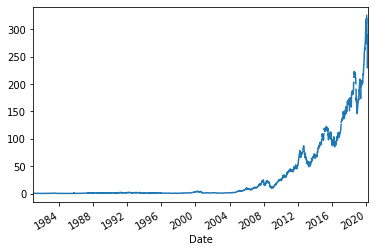

In [10]:
aapl_history["Close"].plot()

In [11]:
aapl_history_last_two_years = aapl.history(start="2018-04-06", end="2020-04-06")
aapl_history_last_two_years

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-05,167.80,169.40,167.31,168.01,26933200,0.0,0
2018-04-06,166.23,167.70,163.54,163.71,35005300,0.0,0
2018-04-09,165.17,168.29,165.14,165.34,29017700,0.0,0
2018-04-10,168.20,169.18,166.77,168.45,28408600,0.0,0
2018-04-11,167.45,169.10,166.94,167.66,22431600,0.0,0
...,...,...,...,...,...,...,...
2020-03-30,250.74,255.52,249.40,254.81,41994100,0.0,0
2020-03-31,255.60,262.49,252.00,254.29,49250500,0.0,0
2020-04-01,246.50,248.72,239.13,240.91,44054600,0.0,0


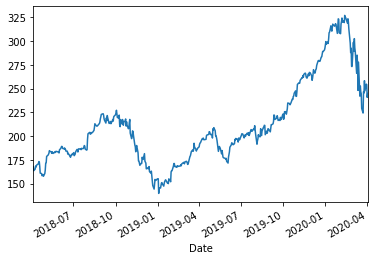

In [12]:
aapl_history_last_two_years["Close"].plot()

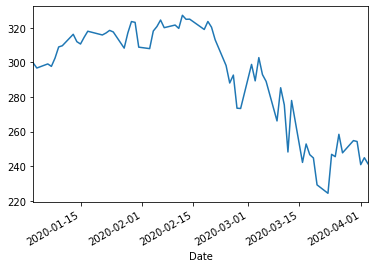

In [13]:
aapl_history_last_two_years.loc["2020-01-01":, "Close"].plot()

In [14]:
tickers = yf.Tickers('AAPL GOOG FCAU')
tickers

yfinance.Tickers object <AAPL,GOOG,FCAU>

In [15]:
aapl = tickers.tickers.AAPL
goog = tickers.tickers.GOOG
fcau = tickers.tickers.FCAU

In [16]:
fcau_info = fcau.info
fcau_info

{'previousClose': 7.25,
 'regularMarketOpen': 7.85,
 'twoHundredDayAverage': 12.987007,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 7.91,
 'navPrice': None,
 'averageDailyVolume10Day': 3001433,
 'totalAssets': None,
 'regularMarketPreviousClose': 7.25,
 'fiftyDayAverage': 9.670286,
 'trailingAnnualDividendRate': None,
 'open': 7.85,
 'toCurrency': None,
 'averageVolume10days': 3001433,
 'expireDate': None,
 'yield': None,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 7.47,
 'priceHint': 2,
 'currency': 'USD',
 'trailingPE': 3.3527384,
 'regularMarketVolume': 2072748,
 'lastMarket': None,
 'maxSupply': None,
 'openInterest': None,
 'marketCap': 15688783872,
 'volumeAllCurrencies': None,
 'strikePrice': None,
 'averageVolume': 4461519,
 'priceToSalesTrailing12Months': None,
 'dayLow': 7.47,
 'ask': 7.71,
 'ytdReturn': N

In [17]:
fcau_info['longName']

'Fiat Chrysler Automobiles N.V.'

In [18]:
aapl_info = aapl.info
goog_info = goog.info

In [19]:
info_dict = {'AAPL': aapl_info,
             'GOOG': goog_info, 
             'FCAU': fcau_info}

filePath = os.path.join(dataFolderPath, "aapl_goog_fcau_stocks_info.json")

with open(filePath, 'w') as file:
    %time json.dump(info_dict, file, indent="\t")

Wall time: 2.99 ms


In [24]:
# removeFile(filePath)

In [20]:
fcau_history_last_two_years = fcau.history(start="2018-04-06", end="2020-04-06")
fcau_history_last_two_years

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-05,19.71,19.89,19.53,19.69,5012800,0.0,0
2018-04-06,19.64,19.83,19.21,19.45,3850400,0.0,0
2018-04-09,19.78,20.02,19.66,19.71,3361000,0.0,0
2018-04-10,20.21,20.29,20.06,20.12,5746000,0.0,0
2018-04-11,20.03,20.27,19.90,19.93,3091000,0.0,0
...,...,...,...,...,...,...,...
2020-03-30,7.00,7.10,6.88,6.97,3731100,0.0,0
2020-03-31,6.99,7.26,6.98,7.19,3423700,0.0,0
2020-04-01,6.94,7.04,6.78,6.82,2440500,0.0,0


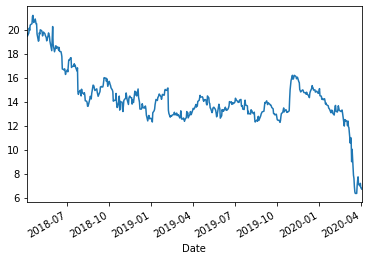

In [21]:
fcau_history_last_two_years["Close"].plot()

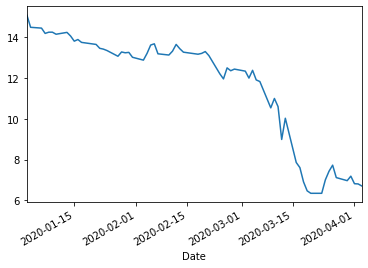

In [22]:
fcau_history_last_two_years.loc["2020-01-01":, "Close"].plot()

### 1.2.2. mass download of market data: `yf.download()` function <a name="get-market-and-meta-data:-yf.download()-function"></a>

In [ ]:
ticker_list = ['^GSPC', '^VIX', ]

## PANDAS + Yahoo Finance

In [ ]:
# for Yahoo Finance API
import yfinance as yf

In [ ]:
data = yf.download("^GSPC", period="max")

In [ ]:
data.info()

In [ ]:
data.loc['2010-01-01':, 'High'].plot()

In [ ]:
data.head()

In [ ]:
data.index

In [ ]:
spx = yf.Ticker("^GSPC")
spx_hist = spx.history(period="max")

In [ ]:
spx_hist.tail()

In [ ]:
data2 = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30", group_by = 'ticker')

In [ ]:
data2.head()

In [ ]:
data2['SPY']